# 1. Tree 분류 모형

In [12]:
#Decision Tree Review
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# 분류모형함수().fit( X변수, y변수 )

# Data 전처리
iris = load_iris()
#iris.target=pd.get_dummies(iris.target)
#iris.target=iris.target.idxmax(axis=1)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    test_size=0.2, 
                                                    random_state=11)
# 학습
model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)#가지치기적용
# test를 넣고 예측해보기
print( model.predict( X_test ) )
print( y_test )
model.score( X_test, y_test )   #정분류율, accuracy

[2 2 1 1 2 0 1 0 0 1 1 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]
[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


0.9333333333333333

- sp500_tm.csv 파일을 sp500이라는 데이터프레임으로 읽으세요
- 결측치를 확인하세요
- 1번/2번/3번 변수를 standard scaling하세요
- x변수들과 y변수를 7:3으로 파티셔닝하세요
 - X_train, X_test, y_train, y_test
- train에 DT를 적용하세요
- test로 accuracy를 구해보세요 

In [20]:
from sklearn.preprocessing import StandardScaler
sp500 = pd.read_csv("sp500_tm.csv")
sp500.isnull().mean()
scaled = StandardScaler().fit_transform( sp500.iloc[ 0:100, 0:3] )

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( scaled, sp500["Direction"],
                                                    test_size=0.3)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier().fit( X_train, y_train)
model.score( X_test, y_test)

0.43333333333333335

In [30]:
sp500 = pd.read_csv("sp500_tm.csv")
sp500.Direction   #
vars = ["Direction", "avgNeg"]
sp500[ vars ]  #1개 이상의 컬럼을 선택 
sp500.drop( "Direction", axis=1)  #컬럼 삭제
sp500.drop( vars, axis=1 ) #vars라는 리스트 내의 컬럼을 삭제
sp500.drop( vars, axis=1, inplace=True ) # sp500에서 해당 컬럼이 삭제
sp500 = pd.read_csv("sp500_tm.csv")
X_train, X_test, y_train, y_test = train_test_split(
  sp500.drop( "Direction", axis=1),     #x변수들
  sp500.Direction, #y변수
  test_size=0.3 )


In [43]:
#1. creditset.csv 파일을 credit라는 데이터프레임으로 읽으세요.
credit = pd.read_csv( "creditset.csv", index_col=0 ) #첫번째 컬럼은 index처리
#2. LTI 컬럼을 지우세요(inplace=True)
credit.drop( "LTI", axis=1, inplace=True)
#3. default10yr컬럼만 지워서 X를 나타내시고, default10yr만 선택해서,
# 8:2로 파티셔닝하세요 (X_train, X_test, y_train, y_test)
X_train, X_test, y_train, y_test = train_test_split(
    credit.drop( "default10yr", axis=1), #X변수들
    credit.default10yr,  #y변수
    test_size=0.2)
#4. train으로 DT 모델링하세요 
model2 = DecisionTreeClassifier().fit( X_train, y_train)
#5. test으로 accuracy 계산해보세요
model2.score( X_test, y_test)
from sklearn.metrics import classification_report
#print( classification_report( model2.predict( X_test), y_test)  )#예측값, 실제y값 
#6. RF로 모델링하세요
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier( n_estimators=500 ).fit( X_train, y_train)
print( classification_report( model3.predict( X_test), y_test)  )#예측값, 실제y값 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       344
           1       0.93      1.00      0.97        56

    accuracy                           0.99       400
   macro avg       0.97      0.99      0.98       400
weighted avg       0.99      0.99      0.99       400



In [ ]:
#train.csv, test.csv를 각각 train, test로 데이터프레임으로 읽으세요
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.isnull().mean()#null값 확인해보세요.
#label변수가 target, 나머지는 X변수들, X변수들에서 MinMaxScaler로 scaling하세요.
from sklearn.preprocessing import MinMaxScaler
train_scaled = MinMaxScaler().fit_transform(  train.drop("label", axis=1) )
test_scaled = MinMaxScaler().fit_transform(  test.drop("label", axis=1) )
#DT, RF로 모델링해보세요 (RF, n_estimators를 100 )
dt = DecisionTreeClassifier().fit( train_scaled, train.label)
rf = RandomForestClassifier(n_estimators=150).fit( train_scaled, train.label)
#test셋으로 classification report를 확인하세요.
print( classification_report( rf.predict(test_scaled), test.label  ))

In [55]:
#1주차 binary.csv를 binary 로 데이터프레임 읽으셔서
binary = pd.read_csv("binary.csv")
# missing 확인 / X변수들 scaling / 8:2로 파티셔닝, y: admit, x: 그외 3개변수
binary.isnull().mean()
scaled = MinMaxScaler().fit_transform( binary[["gre", "gpa", "rank" ]])
#binary.drop("admit", axis=1)
X_train, X_test, y_train, y_test = train_test_split( scaled, binary.admit,
                                                    test_size=0.2)
rf = RandomForestClassifier().fit( X_train, y_train )# rf로만 분류해보세요
# classification report로 성능 평가해보세요.
print( classification_report( rf.predict(X_test), y_test ))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82        66
           1       0.35      0.64      0.45        14

    accuracy                           0.73        80
   macro avg       0.63      0.69      0.63        80
weighted avg       0.81      0.72      0.75        80



[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 120\nvalue = [41, 40, 39]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.55\ngini = 0.5\nsamples = 79\nvalue = [0, 40, 39]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.051\nsamples = 38\nvalue = [0, 37, 1]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.136\nsamples = 41\nvalue = [0, 3, 38]\nclass = virginica')]

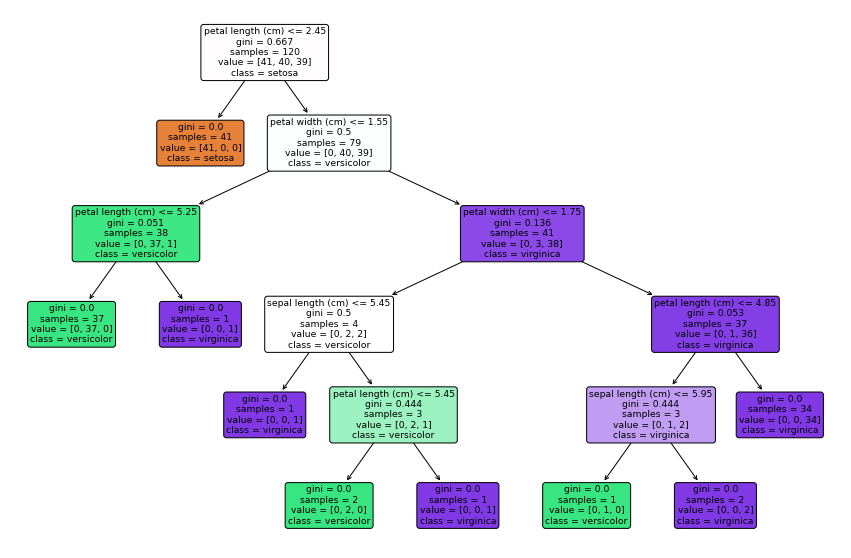

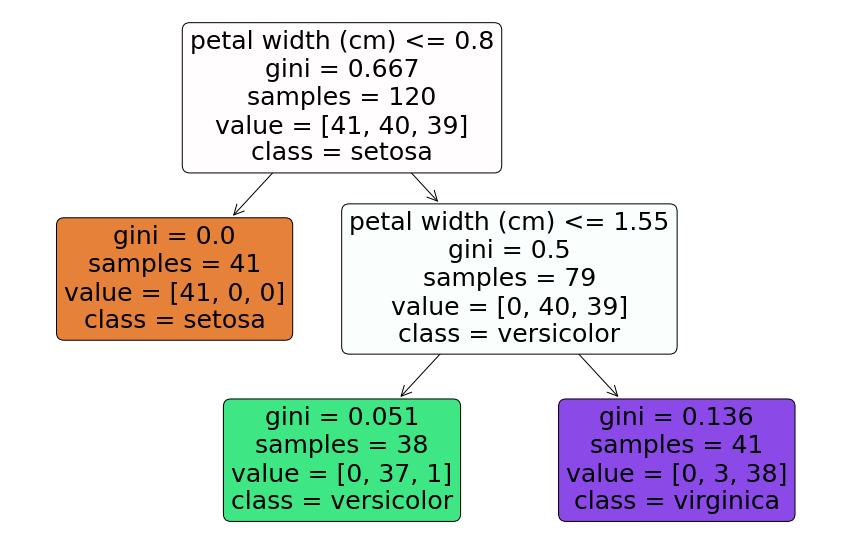

In [13]:
# 결과 시각화
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure( figsize=(15,10) )
tree.plot_tree(model, 
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True, filled=True, rounded=True)

#가지치기(Pruning)
model = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)

# 결정트리 규칙 시각화
plt.figure( figsize=(15,10) )
tree.plot_tree(model, 
               class_names=iris.target_names,
               feature_names=iris.feature_names,
               impurity=True, filled=True, rounded=True)

- Partitioning + Classification

In [ ]:
#-----------------------------------------------------------#
# module
import pandas as pd
import numpy as np

from sklearn import linear_model, metrics, preprocessing
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


#-----------------------------------------------------------#
#Decision Tree + Partitioning

csv_data = pd.read_csv("creditset.csv")
csv_data = csv_data.values
csv_data.shape
X = csv_data[:, 1:4 ]
y  = csv_data[:, 5 ]
X.shape
y.shape

#y=pd.get_dummies(y)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform( X_train)
X_test  = scaler.fit_transform( X_test  )

type(X_train)
type(y_train)

dt1 = tree.DecisionTreeClassifier()
dt1 = dt1.fit(X_train, y_train)
dt1.feature_importances_

pred = dt1.predict( X_test)
np.mean( pred == y_test )

dt1.tree_
dt1.tree_.children_left
dt1.tree_.children_right
dt1.tree_.feature
dt1.tree_.threshold
dt1.tree_.value

# 2. Random Forest

In [ ]:
#-----------------------------------------------------------#
#Random Forest

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
#n_estimators: number of trees
#criterion: string, default "gini", 또는 "entropy"가능
#max_features: default는 auto, 각 분기에 사용할 변수의 수
#max_depth: default는 None이며, 정수
#oob_score: bool, default=False
#n_jobs: numer of parallel jobs, -1이면 컴퓨터 CPU 코어 수로 지정됨
#random_state

rf.fit(X_train, y_train)
rf.estimators_
rf.classes_
rf.n_classes_
rf.n_features_
rf.n_outputs_
rf.feature_importances_
rf.oob_score_

rf.decision_path(X_test)

predicted = rf.predict(X_test)

rf.score(X_test, y_test)
np.mean( predicted == y_test )
accuracy = accuracy_score(y_test, predicted)


# 3. DT vs RF
 - 아래 CSV 파일에 대해 DT, RF의 성능을 비교
 - sp500_tm.csv
 - Direction이 Y변수, 나머지 X변수
 - 7:3으로 파티셔닝
 - RF: n_estimator 100

In [ ]:
csv_data = pd.read_csv("sp500_tm.csv")	
csv_data = csv_data.values
csv_data.shape
y  = 
X = 

X_train, X_test, y_train, y_test = 

#-----------------------------------------------------------#
#Decision Tree



#-----------------------------------------------------------#
#Random Forest






 - sms.csv에 대해서도 DT vs RF 해보세요